# Mushrooms

<div style="height: 150px; width: 100%; overflow:hidden; position: relative;">
    <div style="position: absolute; color: white; bottom: 20%; left: 3%; z-index: 10;">
        <p style="">
        AI centered investigation on mushroom data set. Using python
        </p>
    </div>
    <img src="./resources/background.jpg" alt="Background mushrooms" style="transform: translateY(-18%);" />
</div>


> <p style="font-size: .8em; color: gray;">Presented by:</p>
> ARGUELLO Camilo <br>
> EHRLE Steffen

## Contents

1. [Introduction](#introduction)
2. [State of art](#state-of-art)
3. [Mushrooms](#mushrooms)
4. [Analysis](#analysis)
5. [Results](#results)
6. [Conclusions](#conclusions)

## Introduction

<p style="text-align: justify"> Eating wild mushrooms can be a treat; they are one of the few plant foods which contain vitamin D and some other benefits for the human beings [3], however, adverse reactions can occur after eating a wild mushroom. Some of those negative reactions include serious respiratory symptoms, with nauseas and vomiting. As consecuence vital organs could be damaged, which can result in death. [1] Thus, the objective for this research is to analyze and predict whether a mushroom is edible or poisonous based on certain characteristics. </p>

## State of art

It  is  very  difficult  to  distinguish  between  edible and  poisonous  mushrooms.  Based on the experience of many scientist, there  are  some  observations,  which  may  help  to  identify the poisonous  mushrooms: bright color,  pink  spores,  a hot burning  taste  or  acidic  flavor,  growing  on  wooden  pieces in  hidden  places,  difficult  to  break  and  bear  a  cup  like structure  (volva)  at  the  base.  Some  of  the   poisonous mushrooms   when   taken   orally   produce   hallucinations. These include toadstools of the  genera Amanita, Psilocybe and Conocybe [5].

In the literature, many authors have worked on solve this problem using new techniques such as trained algorithms, predictors and so on. One of them was presented by Glockner [2], who used a deep learning algorithm to solve the problem even when there are few information about mushrooms. Glockner found almost 1200 pictures about edible and poisonous mushrooms. Using a TensorFlow based network to train the algorithm. To test the program, each image has a score for poison and for edible (0..1), with an accuracy of almost ~97%.

<p>Other projects such as the present by Garziano [4], who creates a huge domain knowledge about the mushrooms. His study includes the feature analysis such as the structure, color, shape and size of a mushroom. Each feature gives a importance to determine if the mushroom is edible or not. The feature analysis gives some interesting facts to solve the problem, i.e  <i>"only poisonous mushrooms have convex cap-shape</i> or <i>"only edible mushrooms have sunken cap-shape"</i> Also, the analysis provided the importance level for each feature compared with the others ones. Finally, the author were able to estimate if a mushroom was edible or not based on certain characteristics.</p>

## Mushrooms

Mushrooms are a type of fungus. They are non-flowering and can grow in a variety of habitats. Mushrooms and other fungi reproduce by small dust-like particles called spores. Typically produced above ground on soil or on its food source.

They have a long history, both in folklore and in the kitchen. where we can cook many species of them. Also, mushrooms have served humans as medecine and psychoactive drugs, religious symbols and helpful tools.

<img src="http://4.bp.blogspot.com/_d76A8FQ9xm0/SZomQ1rQyeI/AAAAAAAABFc/wQsySaXNqno/s400/mushroom+diagram.jpg" />

Identifying mushrooms requires a basic understanding of their structure.  They have spores which are produced on the gills (under the cap). The ring which surround the stem or stalk is present in some species. The base is called volva (in the bottom). 

An important factor to the identification is the color, this is used to help classify mushrooms and it can help to identify them. Spore print colors include white (most common), brown, black, purple-brown, pink, yellow, and creamy, but almost never blue, green, or red.

In the literature, there are some clasifications for the Mushrooms. The fungi society of Saskatchewan created a glossary to help to understand the mushrooms [7].

### Mushroom Features Glossary

The cap can be found on different presentations such as the convex, or conical and even flat. This is the upper parte of the mushroom. We can see some examples in the following image.

<img src="./resources/cap_shapes.jfif" width="500px" />

Under the cap there is a region called the Gills, which is a series of radially surfaces. The spores depends by the gills.

<img src="./resources/gill_spacing.jfif" alt="" />

The stalk, also known as stem is the main support of the mushroom. It is topped by the cap.

The mushrooms also have a ring, which is a surface circligng the stem. It is present of mature mushroms. The ring is also a tissue that connects the stem and the caps before the gills are exposed and the fruiting body develops. It is present in some species of mushrooms, not in all.

<img src="./resources/annular_rings.jfif" width="500px"/>

In the base of the mushroom exists the volva, which is a cup rounded. It is present befor the fruiting body appears.

<img src="./resources/stipes_stmes.jfif" width="500px" />

Based on this research we would like analyze the mushroom to determine whether they are edible or not.

## Analysis

All the libraries needed for the project are in the `sllab.py` file.

In [31]:
from sllab import *

The `MultiColumnLabelEncoder` class was added to help, analyze and manage the data. The reason to use it was to reshape the information into a numerical values.

In [32]:
# A utility from https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
# Adapted and changed to Labelbonarizer that fits with the whole dataframe.
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
        self.lb = pp.LabelEncoder()
        
    def fit(self,X,y=None):
        self.lb.fit(np.concatenate(X.to_numpy(), axis=0))
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is None:
            self.columns = output.columns
        
        for col_id, col in enumerate(self.columns):
            output[col] = self.lb.transform(output[col])
                
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    

The mushroom dataset, provide different files where the information was classified by `short-names` and `expanded`. Both contains information about more than 1 thousand of studied species and their characteristics. In terms of the project, the caracteristics are called features. In the expanded file, we could find the whole dataset with the full name for each feature, however in the `agaricus-lepiota.data` or short name file, only the first letter for each feature name is stored. This is an optimization in terms of use of hardware resources.

In [3]:
data_names = pd.read_csv("expanded",
                    skiprows=9,
                    skipfooter=1)

In [4]:
data_names.head()

,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE.1,...,SMOOTH.2,WHITE.2,WHITE.3,PARTIAL,WHITE.4,ONE,PENDANT,PURPLE,SEVERAL,WOODS
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS


In [5]:
dataset = pd.read_csv("agaricus-lepiota.data",
                    skiprows=9,
                    skipfooter=1)

In [6]:
dataset.head()

,e,b,s,y,t,a,f,c,b.1,g,...,s.2,w,w.1,p,w.2,o,p.1,k,s.3,m
0,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g
1,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,s,m
2,e,b,s,y,t,a,f,c,b,w,...,s,w,w,p,w,o,p,n,s,g
3,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
4,e,x,f,n,f,n,f,w,b,n,...,f,w,w,p,w,o,e,k,a,g


## Understanding the data

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

1. Adding titles to organize the info

In [7]:
classes = np.array([
    'class',
    'cap-shape', 
    'cap-surface', 
    'cap-color',
    'bruises?',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'])

featured_classes = np.array([
    'cap-shape', 
    'cap-surface', 
    'cap-color',
    'bruises?',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'])

The data is separated into features `X` and expected value `y`.

In [8]:
dataset = pd.DataFrame(dataset.values, columns=classes)
X_data, y_data = pd.DataFrame(dataset, columns=featured_classes), pd.DataFrame(dataset, columns=['class'])

2. Transform the data into a numerical values. Using the previous MultiColumnLabelEncoder function we can rebuild the information in terms of numbers to analyze them.

In [33]:
from sklearn.preprocessing import StandardScaler

X = MultiColumnLabelEncoder().fit_transform(X_data)
y = MultiColumnLabelEncoder().fit_transform(y_data)

In [10]:
X.shape

(8113, 22)

In [11]:
print("Data mean, and a standard deviation",np.mean(X),np.std(X))

Normalized data mean, and a standard deviation cap-shape                   12.869839
cap-surface                 15.532109
cap-color                   11.708000
bruises?                    10.565142
odor                        10.606434
gill-attachment              5.871194
gill-spacing                 5.747073
gill-size                    5.092567
gill-color                  10.852582
stalk-shape                 11.814249
stalk-root                   2.177000
stalk-surface-above-ring    13.290768
stalk-surface-below-ring    13.482559
stalk-color-above-ring      15.876618
stalk-color-below-ring      15.817453
veil-type                   14.000000
veil-color                  19.825342
ring-number                 13.291384
ring-type                   10.226427
spore-print-color           12.928017
population                  17.313078
habitat                      8.076174
dtype: float64 cap-shape                   7.496994
cap-surface                 6.541714
cap-color                   

## Our approach

Our idea was that we can translate the classes to numerical data. This way we could try linear regression methods.

> Of course it may make no sense, if the outcome is 'between' labels, but it can yield sense in a way, as some classes are more fluid than others (i.E. colors: A mushroom can be in between yellow and white (beeing bright yellow))
>
>Even though we have no data on this level of accuracy, we might build a regression model that supports it.

Also we could use correlation methods i.e. Pearsons Correlation to identify correlations between classes, this way we might find correlations that are not visible or more than 2-Dimensional.


In [47]:
#y_labels = y.astype(int)[:,-1] # Parsing into a boolean values
y_labels = y.astype(int).values[:,-1]
random_state = 42

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y_labels, random_state=random_state)

How do we define a good value for n_neighbors or k value? Using a square root of the data length and checking that it is an odd number!

In [48]:
#import math
#k = math.sqrt(len(y_test))

## So, the optimal value for k is k - 1
n_neighbors = int(math.sqrt(len(y_test)))

In [49]:
import math
int(math.sqrt(len(y_test)))

45

Text(0, 0.5, 'Accuracy')

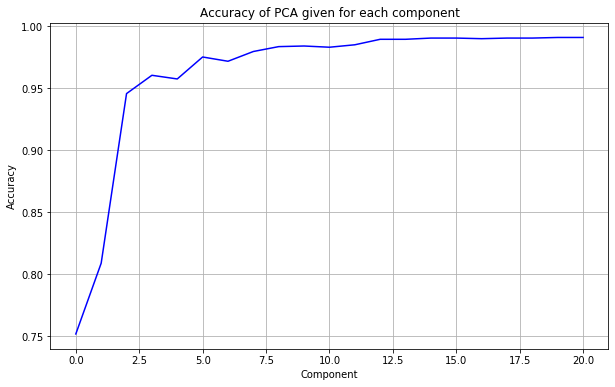

In [50]:
## 22 is the max number of components given the available features
acc = []

for i in range(1,len(featured_classes)):
    #PIPELINE
    pca = make_pipeline(PCA(n_components=i, random_state=random_state))
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,p=2,metric='euclidean')
    pca.fit(X_train, y_train)
    knn.fit(pca.transform(X_train), y_train)
    acc_knn = knn.score(pca.transform(X_test), y_test)
    acc.append(acc_knn)
    
plt.figure(figsize=(10,6))
plt.plot(range(len(acc)), acc,'b-')
plt.grid(True)
plt.title("Accuracy of PCA given for each component")
plt.xlabel("Component")
plt.ylabel("Accuracy")

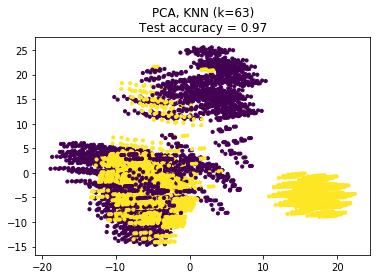

In [46]:
#PIPELINE
# Reduce dimension to 2 with PCA
# n_component=10 based on the accuracy test
pca = make_pipeline(PCA(n_components=10, random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
# p = 2 we are looking for Mushroom edible or not
knn = KNeighborsClassifier(n_neighbors=n_neighbors,p=2,metric='euclidean')
pca.fit(X_train, y_train)

#trans = pca.transform(X_train)
#print(trans, X_train.shape, y_train.shape)
# Fit a nearest neighbor classifier on the embedded training set
knn.fit(pca.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(pca.transform(X_test), y_test)

# Embed the data set in 2 dimensions using the fitted model
X_embedded = pca.transform(X)

# Plot the projected points and show the evaluation score
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_labels, s=10)
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format('PCA', n_neighbors, acc_knn))
plt.show()

### Evaluating the model

In [25]:
y_pred = knn.predict(pca.transform(X_test))

print(len(y_pred), y_pred.shape,len(y_test), len(X_test), X_test.shape)
print(y_pred)

2029 (2029,) 2029 2029 (2029, 22)
[1 1 1 ... 1 0 0]


In [26]:
print("Using PCA",classification_report(y_test, y_pred, target_names=['edible','poisonous']))

Using PCA               precision    recall  f1-score   support

      edible       0.97      0.98      0.97      1050
   poisonous       0.98      0.97      0.97       979

    accuracy                           0.97      2029
   macro avg       0.97      0.97      0.97      2029
weighted avg       0.97      0.97      0.97      2029



<img src="./resources/confusion_table_ef.JPG" width="" />

In [27]:
confusion_matrix(y_test,y_pred)

array([[1027,   23],
       [  30,  949]], dtype=int64)

- As result we have 3087 mushroom edible species.
- 3033 poisonous mushrooms.
- 109 possible errors
- 503 false positives. 

In [29]:
f1_score(y_test,y_pred)

0.9728344438749358

In [30]:
accuracy_score(y_test,y_pred)

0.9738787580088714

## Conclusion

## Reference

(1) Metzler S. Metzler V. Orson K. Texas Mushrooms. University of Texas Press. Austin. https://books.google.cz/books?id=HRtfvVigMmsC&pg=PA37&redir_esc=y#v=onepage&q&f=false <br>
(2) Deep Learning and Poisonous Mushrooms - Cyrill Glockner https://towardsdatascience.com/deep-learning-and-poisonous-mushrooms-4377ea4c9b80 <br>
(3) Haytowitz. Vitamin D in Mushrooms. Nutrient Data Laboratory, Beltsville Human Nutrition Research Center. <br>
(4) Mushrooms Classification - Giorgio Garziano <br> https://datascienceplus.com/mushrooms-classification-part-1/ <br>
(5) Indiana State Parks - Common Mushrooms <br>
(6) British Fungi - Elementary Text-Book <br>
(7) https://www.usask.ca/biology/fungi/home_%20page.shtml